## Simple Linear Regression  - accuracy showed is  76724.671



In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import tensorflow.keras as keras 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [19]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [20]:
train.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


### Basic Inspection

In [21]:
train.shape

(54273, 13)

In [22]:
train.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


In [23]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [24]:
train.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

### Check for missing values

In [25]:
train.isnull().sum()


id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [26]:
print(train.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


#### Since no null we proceed further and visualize correlation

### Data Exploration

In [27]:
cat=train.select_dtypes(include=['object']).columns
num=train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables")
print(cat)
print("Numerical Variables")
print(num)

Categorical Variables
Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')
Numerical Variables
['id', 'model_year', 'milage', 'price']


#### Encoding categorical variables so that the model can understand them better

In [28]:
print(train['brand'].value_counts())

BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Mercury   

### Encoding Test and Train Data

In [29]:
label_encoder = preprocessing.LabelEncoder() 
train['brand'] = label_encoder.fit_transform(train['brand'])
train['model'] = label_encoder.fit_transform(train['model'])
train['fuel_type'] = label_encoder.fit_transform(train['fuel_type'])
train['engine'] = label_encoder.fit_transform(train['engine'])
train['transmission'] = label_encoder.fit_transform(train['transmission'])
train['ext_col'] = label_encoder.fit_transform(train['ext_col'])
train['int_col'] = label_encoder.fit_transform(train['int_col'])
train['accident'] = label_encoder.fit_transform(train['accident'])
train['clean_title'] = label_encoder.fit_transform(train['clean_title'])


In [30]:
test['brand'] = label_encoder.fit_transform(test['brand'])
test['model'] = label_encoder.fit_transform(test['model'])
test['fuel_type'] = label_encoder.fit_transform(test['fuel_type'])
test['engine'] = label_encoder.fit_transform(test['engine'])
test['transmission'] = label_encoder.fit_transform(test['transmission'])
test['ext_col'] = label_encoder.fit_transform(test['ext_col'])
test['int_col'] = label_encoder.fit_transform(test['int_col'])
test['accident'] = label_encoder.fit_transform(test['accident'])
test['clean_title'] = label_encoder.fit_transform(test['clean_title'])


In [31]:
print(train['clean_title'].value_counts())


0    54273
Name: clean_title, dtype: int64


In [32]:
train.drop(['clean_title'],axis=1,inplace=True)

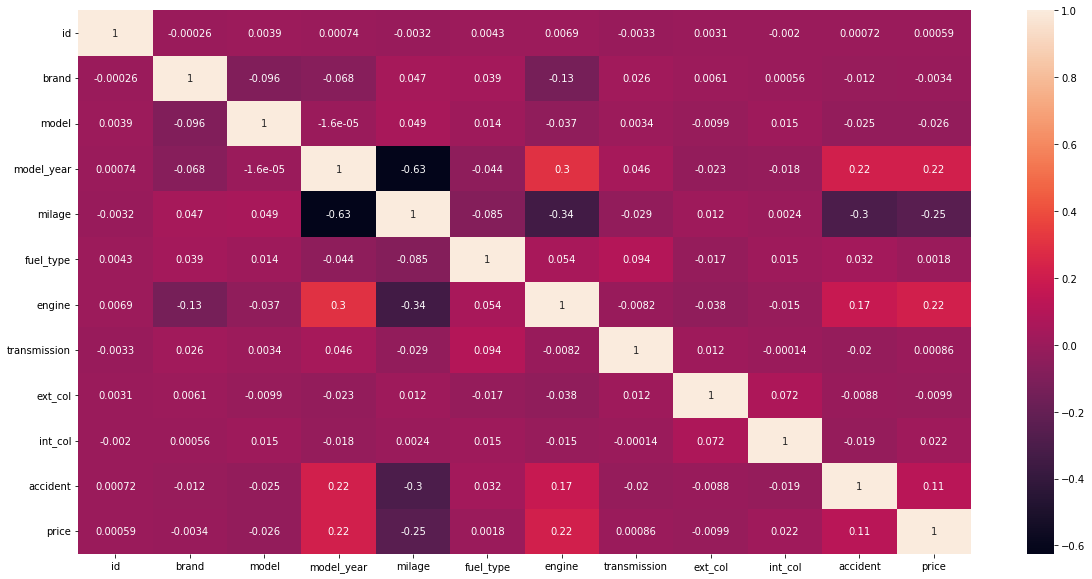

                    id     brand     model  model_year    milage  fuel_type  \
id            1.000000 -0.000263  0.003902    0.000741 -0.003194   0.004255   
brand        -0.000263  1.000000 -0.095992   -0.068357  0.047288   0.038529   
model         0.003902 -0.095992  1.000000   -0.000016  0.048665   0.013908   
model_year    0.000741 -0.068357 -0.000016    1.000000 -0.625226  -0.044165   
milage       -0.003194  0.047288  0.048665   -0.625226  1.000000  -0.084541   
fuel_type     0.004255  0.038529  0.013908   -0.044165 -0.084541   1.000000   
engine        0.006901 -0.134387 -0.036810    0.301074 -0.342713   0.053997   
transmission -0.003338  0.025874  0.003388    0.046235 -0.029160   0.094454   
ext_col       0.003128  0.006090 -0.009944   -0.023136  0.012430  -0.017347   
int_col      -0.001977  0.000565  0.015077   -0.018272  0.002399   0.015191   
accident      0.000719 -0.012365 -0.024859    0.216034 -0.295166   0.031950   
price         0.000587 -0.003448 -0.025998    0.2161

In [40]:
correlation_matrix=train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()
print(correlation_matrix)


In [34]:
x_train=train.drop(columns=['price'])
y_train=train['price']
x_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,0,14,644,2018,74349,2,719,2,26,57,1
1,1,4,49,2007,80000,2,534,18,17,9,1
2,2,21,1771,2009,91491,2,541,14,181,6,1
3,3,4,1748,2022,2437,3,646,43,100,24,1
4,4,40,693,2001,111000,2,219,34,249,9,1


In [35]:
y_train.head()

0    11000
1     8250
2    15000
3    63500
4     7850
Name: price, dtype: int64

In [36]:
test.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

### Visualization

In [37]:
train['price']

0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: int64

### Building Model

In [38]:
#seperating Numerical and Categorical variables for better analysix
cat=test.select_dtypes(include=['object']).columns
num=test.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables")
print(cat)
print("Numerical Variables")
print(num)


Categorical Variables
Index([], dtype='object')
Numerical Variables
['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [39]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(test)

/home/agrima/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clean_title
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 12 features, but LinearRegression is expecting 11 features as input.

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'price': y_pred})
submission.to_csv('submission.csv', index=False)
print(submission.head())

      id         price
0  54273  39382.442751
1  54274  21901.437043
2  54275  42997.622238
3  54276  65649.634172
4  54277  34701.585307
